c:\Python\VisionA\carpetas\VisionArtificial\segmentacion\otsu.py:43: RuntimeWarning: invalid value encountered in scalar divide
  m_f = m/sum(f)


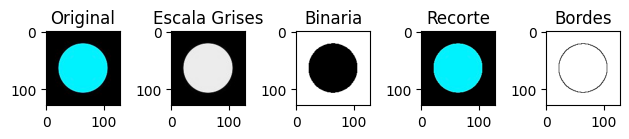

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from general import rgb2gray
from segmentacion.otsu import thresholdOtsu
from formas_binarias import detectar_bordes_binarios
from formas_binarias import FreemanChain

image2 = cv2.imread('imagenesPruebas/circle1.png')
imgGray = rgb2gray(image2)
binary = thresholdOtsu(imgGray)
masked = np.zeros_like(image2)
bordes_detectados = detectar_bordes_binarios(binary, 3)
for i in range(image2.shape[1]):
    for j in range(image2.shape[0]):
        if 1-binary[j, i] == 0:
            masked[j, i, :] = image2[j, i, :]
fig, axs = plt.subplots(1, 5)
axs[0].imshow(image2)
axs[0].set_title("Original")
axs[1].imshow(imgGray, cmap='gray')
axs[1].set_title("Escala Grises")
axs[2].imshow(binary, cmap='binary')
axs[2].set_title("Binaria")
axs[3].imshow(masked)
axs[3].set_title("Recorte")
axs[4].imshow(bordes_detectados, 'binary')
axs[4].set_title("Bordes")
fig.tight_layout()


In [4]:
chainCircle, borderCircle = FreemanChain(binary, 8)
print(chainCircle)
print(borderCircle)

(21, 61)
forzamos termino 
[0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 7, 0, 0, 7, 0, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 7, 7, 0, 7, 7, 7, 7, 6, 7, 7, 7, 6, 7, 7, 6, 7, 6, 7, 6, 7, 6, 6, 7, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[(21, 61), (21, 62), (21, 63), (21, 64), (21, 65), (21, 66), (21, 67), (22, 68), (22, 69), (22, 70), (22, 71), (22, 72), (22, 73), (23, 74), (23, 75), (23, 76), (24, 77), (24, 78), (24, 79), (25, 80), (25, 81), (26, 82), (26, 83), (27, 84), (27, 85), (

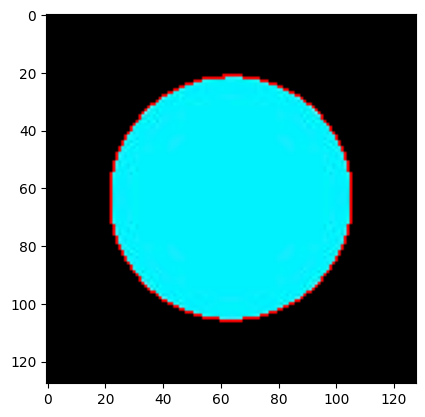

In [5]:
from bordes import replaceColor
replaceColor(masked, borderCircle, (255,0,0))